## Time Series Forecasting 
![](https://imagesvc.meredithcorp.io/v3/mm/image?url=https%3A%2F%2Fmoneydotcomvip.files.wordpress.com%2F2017%2F03%2F170314_stocks.jpg&w=800&c=sc&poi=face&q=85)

*<sup><sub>Taken from http://money.com/money/4697361/out-of-favor-stock-market-picks/</sup></sub>*

## Time Series Forecasting
   ![](https://d2908q01vomqb2.cloudfront.net/f1f836cb4ea6efb2a0b1b99f41ad8b103eff4b59/2018/07/09/financial-time-series-2.gif)
*<sub><sup>Taken from https://aws.amazon.com/blogs/machine-learning/forecasting-time-series-with-dynamic-deep-learning-on-aws/</sup></sub>,* 

## Time Series Preprocessing

### Stationary timeseries
- Stationary: mean, variance, covariance do not change over time



![](https://s3-ap-south-1.amazonaws.com/av-blog-media/wp-content/uploads/2018/09/ns5-e1536673990684.png)
*Taken from https://www.analyticsvidhya.com/blog/2018/09/non-stationary-time-series-python/*

### Moving Averages
- removes effect of random variation
- smooth out short-term fluctuations
- mean of successuve smaller sets of numbers


<div align="center"> $ M_t = \frac{X_t + X_{t-1} + \cdots + X_{t-N+1}}{N} \,  $ </div> 

### Moving average with a window size 50:

![](data/moving_average.gif)

### Exponential moving average

- weighting factors that decrease exponentially (never zero)

<div align="center"> $   
    S_t=\left\{
                \begin{array}{ll}
                      Y_1,       &  t=1 \\
                      \alpha \cdot Y_t + (1-\alpha) \cdot S_{t-1},  & t>1
                \end{array}
              \right.
   $ </div> 



![](data/ewm.gif)

## Time Series Models

### Traditional ML approaches:
- Autoregressive models
- Integration models
- Moving average models
- Autoregressive moving average (ARMA)
- Autoregressive integrated moving average (ARIMA)

### Deep Learning approaches:
- RNNs, LSTMs
- LSTNet https://arxiv.org/abs/1703.07015
- DeepAR https://arxiv.org/abs/1704.04110

### Autoregressive Models

- linear combination of predictors
- value at the current time $t$ depends on the values at time $t-1$, $t-2$, etc.


<div align="center"> $y_{t} = c + \alpha_{1}y_{t-1} + \alpha_{2}y_{t-2} + \dots + \alpha_{p}y_{t-p} + \varepsilon_{t} $ </div> 

### Simulate an autoregressive timeseries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams

# set seed 
np.random.seed(1)

# initialize x and w
x =  np.random.normal(size=1000)
epsilon = np.random.normal(size=1000)

alpha = 0.9

# create timeseries
for t in range(1000):
    x[t] = alpha*x[t-1] + epsilon[t]

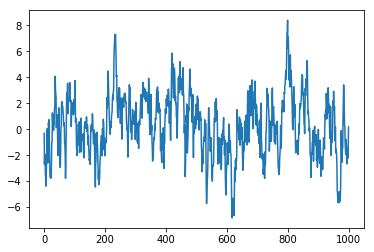

In [2]:
# plot
plt.plot(x)
plt.show()

### Find the best AR model that fits the data

In [3]:
import statsmodels.tsa.api as smt

mdl = smt.AR(x).fit(trend='nc')
est_order = smt.AR(x).select_order(maxlag=30, ic='aic', trend='nc')

In [4]:
print('\nalpha estimate: {:3.5f} | best lag order = {}'.format(mdl.params[0], est_order))


alpha estimate: 0.90303 | best lag order = 1


In [5]:
y= mdl.predict(50,len(x))

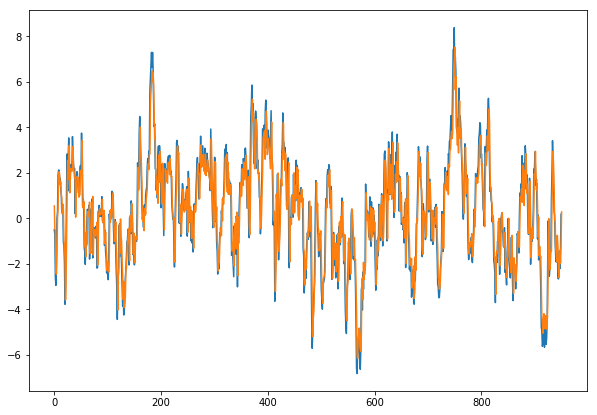

In [6]:
plt.figure(figsize=(10,7))
plt.plot(x[50:])
plt.plot(y)

- not to be confused with the moving average that I have shown before
- A moving average model is used for forecasting future values
- moving average smoothing is used for estimating the trend-cycle of past values.
- weighted moving average of the past few forecast errors
- The motivation for the MA model is that we can observe "shocks" in the error process directly by fitting a model to the error terms.
- MA model simply means that the time series is a function of the error from previous periods. 
- can be used for timeseries without trends and seasonal variations. otherwise we have to difference it beforehand

### Moving Average Models


- linear combination of errors
- value at the current time  $t$ depends on the past **forecast errors** at timestep $t-1$, $t-2$, etc.


<div align="center"> $ y_{t} = c + \varepsilon_t + \theta_{1}\varepsilon_{t-1} + \theta_{2}\varepsilon_{t-2} + \dots + \theta_{q}\varepsilon_{t-q}$  </div> 

In [7]:
mdl = smt.ARMA(x, order=(1,0)).fit(maxlag=30, method='mle', trend='nc')

In [8]:
print('\nalpha estimates: {}'.format(mdl.params))


alpha estimates: [0.8970164]


In [9]:
# fit MA model

mdl = smt.ARMA(x, order=(0,1)).fit(maxlag=30, method='mle', trend='nc')

In [13]:
print('\nalpha estimates: {}'.format(mdl.params))


alpha estimates: [0.75099676]


In [14]:
y = mdl.predict(0, len(x))

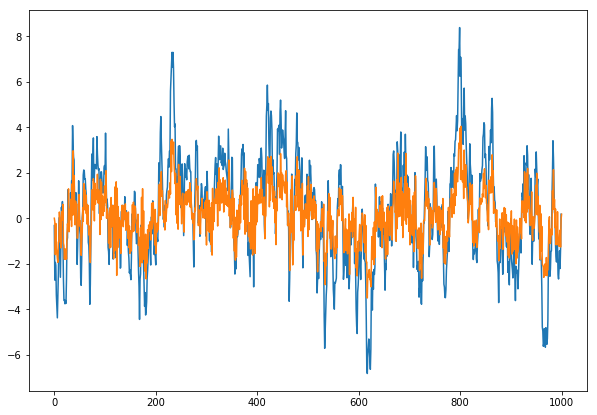

In [15]:
plt.figure(figsize=(10,7))
plt.plot(x)
plt.plot(y)

### ARIMA
Parameters:
- number of lag observations
- number of times that raw observations are differenced
- size of moving average window

<div align="center"> $
\begin{equation}
  y'_{t} = c + \alpha_{1}y'_{t-1} + \cdots + \alpha_{p}y'_{t-p}
     + \theta_{1}\varepsilon_{t-1} + \cdots + \theta_{q}\varepsilon_{t-q} + \varepsilon_{t}
\end{equation}
$ </div> 

### ARIMA - Check stationarity

In [16]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd

df = pd.Series.from_csv("data/example_temperature.csv", header=0)

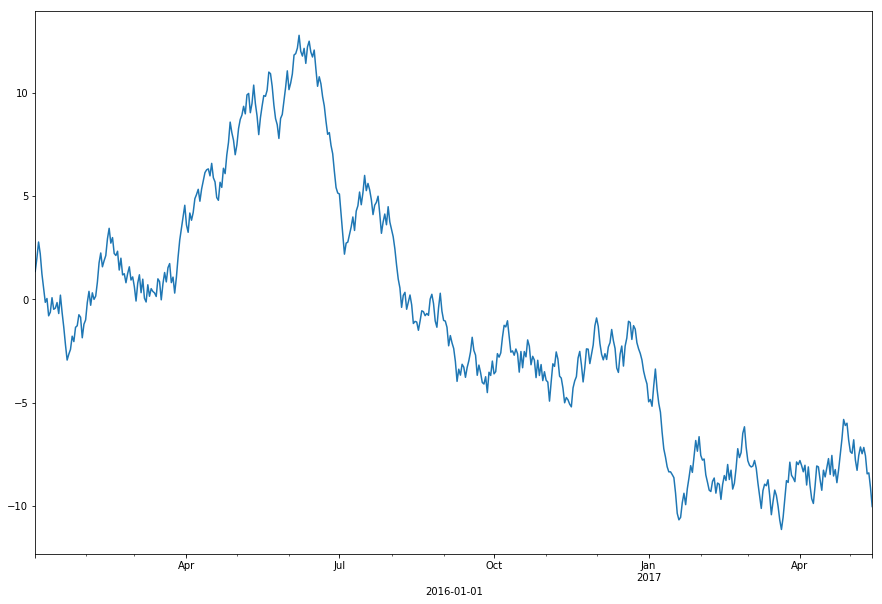

In [17]:
df.plot()

def resize_figure(width=15, height=10):
    f = plt.gcf()
    f.set_figheight(height)
    f.set_figwidth(width)
resize_figure()

### Difference the time series once

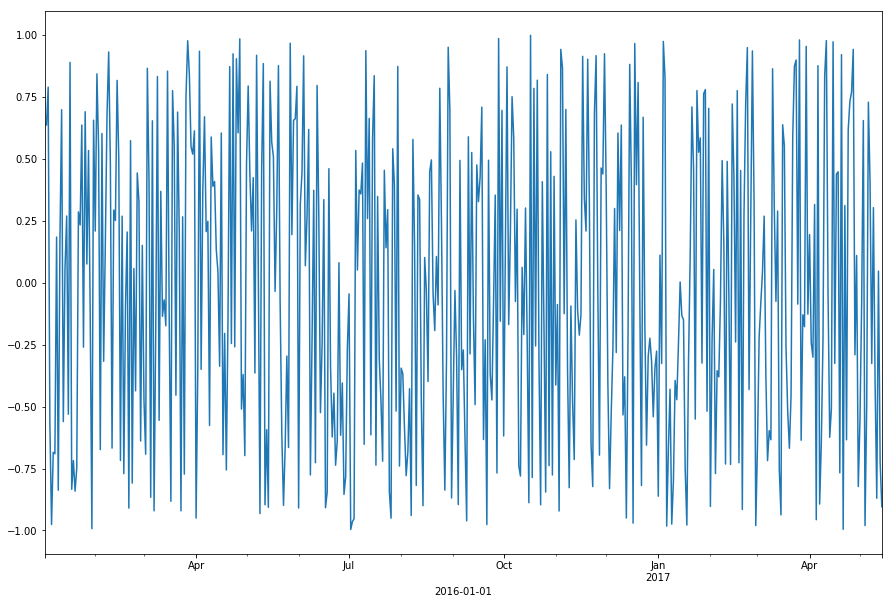

In [18]:
df.diff().plot()
resize_figure()

(array([59., 62., 40., 58., 42., 30., 54., 52., 48., 53.]),
 array([-0.99607351, -0.7966174 , -0.59716129, -0.39770518, -0.19824907,
         0.00120704,  0.20066316,  0.40011927,  0.59957538,  0.79903149,
         0.9984876 ]),
 <a list of 10 Patch objects>)

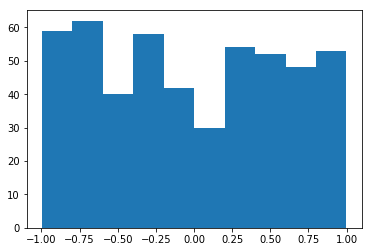

In [22]:
plt.hist(df.diff())

### Difference the time series twice

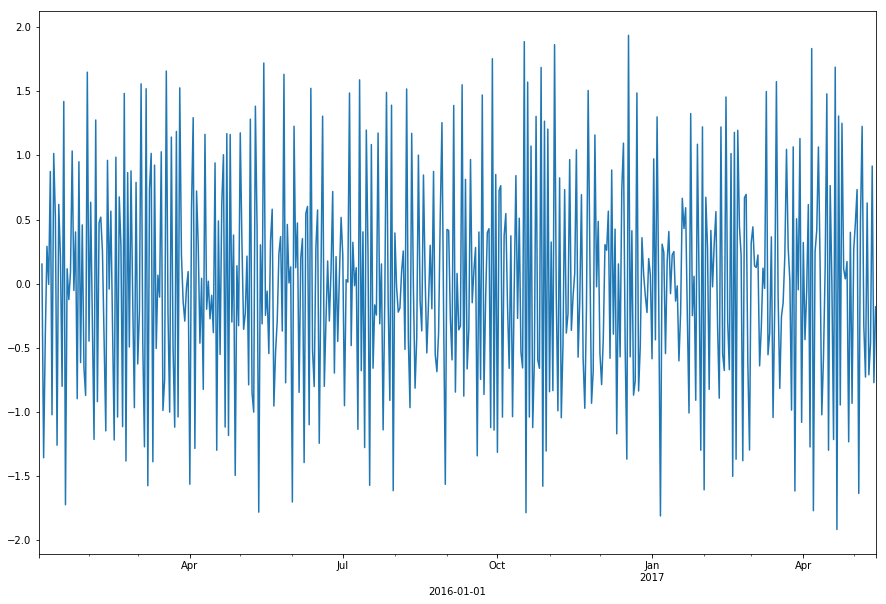

In [23]:
df.diff().diff().plot()
resize_figure()

(array([16., 29., 59., 68., 82., 84., 62., 40., 42., 15.]),
 array([-1.91586294, -1.5306821 , -1.14550126, -0.76032042, -0.37513958,
         0.01004125,  0.39522209,  0.78040293,  1.16558377,  1.5507646 ,
         1.93594544]),
 <a list of 10 Patch objects>)

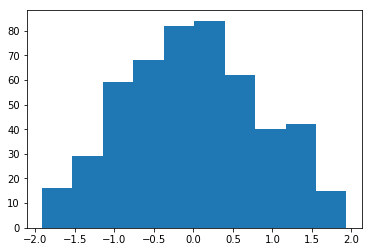

In [24]:
plt.hist(df.diff().diff())

### Check autocorrelation

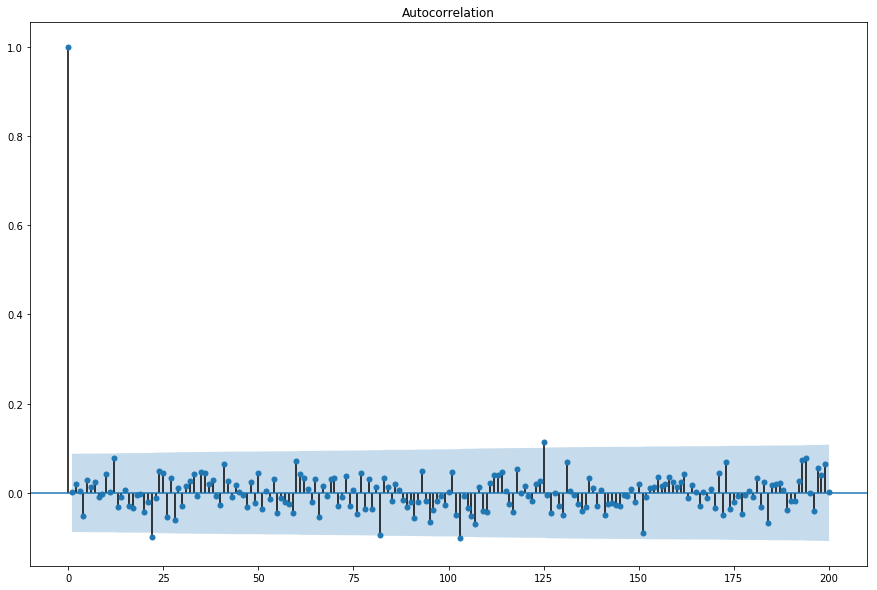

In [22]:
from sklearn import metrics
from statsmodels.graphics.tsaplots import plot_acf
o = plot_acf(df.diff()[1:], lags=200)
resize_figure()

### For comparison - without differencing

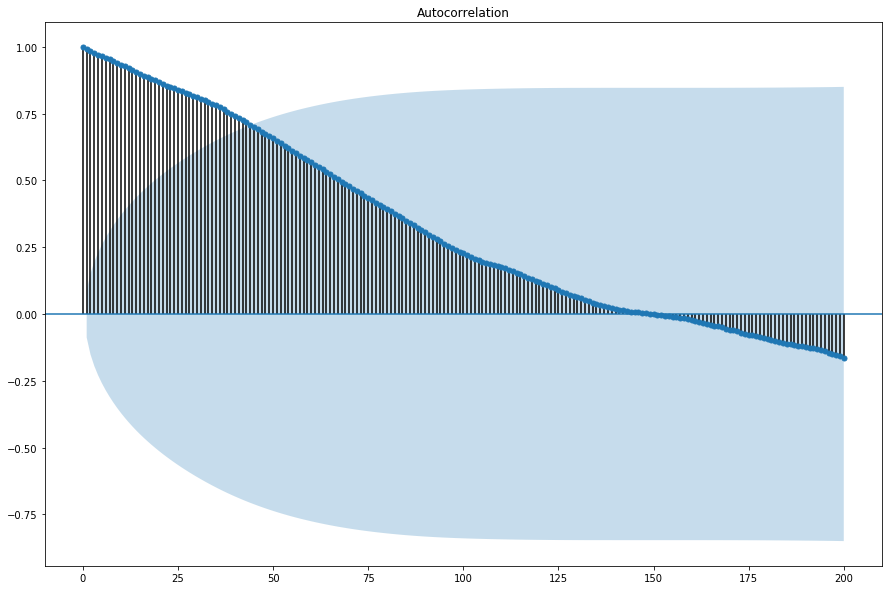

In [23]:
from statsmodels.graphics.tsaplots import plot_acf
o = plot_acf(df[1:], lags=200)
resize_figure()

In [24]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(df, order=(5,2,0))
model_fit = model.fit(disp=0)

In [28]:
print(model_fit.summary())

                               ARIMA Model Results                               
Dep. Variable:     D2.0.5180396575667412   No. Observations:                  497
Model:                    ARIMA(5, 2, 0)   Log Likelihood                -487.718
Method:                          css-mle   S.D. of innovations              0.645
Date:                   Wed, 12 Jun 2019   AIC                            989.436
Time:                           16:58:19   BIC                           1018.896
Sample:                       01-04-2016   HQIC                          1000.999
                            - 05-14-2017                                         
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -0.0012      0.008     -0.145      0.885      -0.017       0.015
ar.L1.D2.0.5180396575667412    -0.8334      0.044    -18

### Make predictions

In [26]:
predicted = model_fit.predict(100,150)
p1 = predicted["2016-04-11":"2016-05-31"]
p2 = df.diff().diff()["2016-04-11":"2016-05-31"]

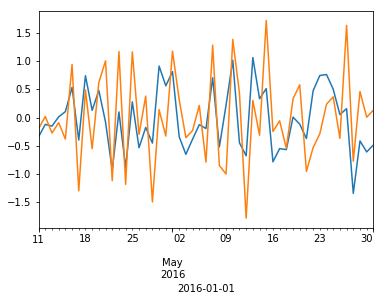

In [27]:
p1.plot()
p2.plot()

### Plot residuals 
- residuals: difference between prediction and actual measurement

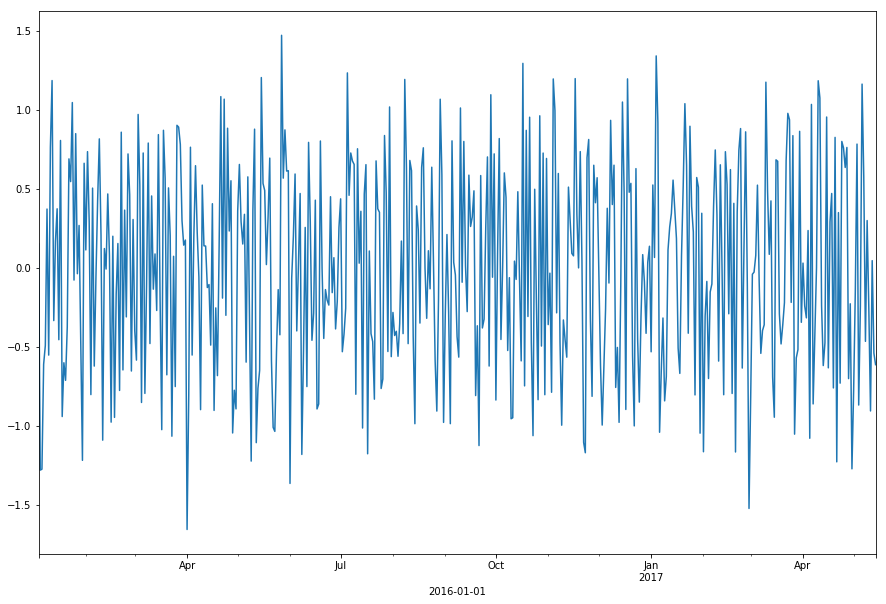

In [29]:
model_fit.resid.plot()
resize_figure()

### Plot residuals
Residuals should follow a Gaussian distirbuton and mean should be 0.

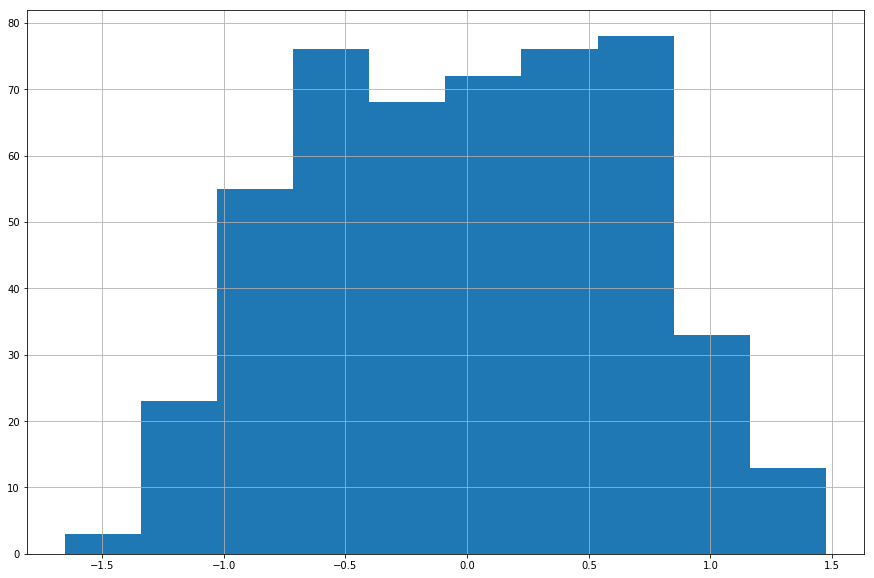

In [30]:
model_fit.resid.hist()
resize_figure()

### Conclusion

- ARIMA, AR, MA models work well for univariate time series
- they require stationarity
- can only capture linearities